This notebook will be mainly used for the capstone project.

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [258]:
df_load=pd.read_csv('Data-Collisions.csv')
print(len(df_load))
df_load.head()

194673


e:\app\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [167]:
df_load.iloc[1]

SEVERITYCODE                                                      1
X                                                          -122.347
Y                                                           47.6472
OBJECTID                                                          2
INCKEY                                                        52200
COLDETKEY                                                     52200
REPORTNO                                                    2607959
STATUS                                                      Matched
ADDRTYPE                                                      Block
INTKEY                                                          NaN
LOCATION                 AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N
EXCEPTRSNCODE                                                   NaN
EXCEPTRSNDESC                                                   NaN
SEVERITYCODE.1                                                    1
SEVERITYDESC                         Property Da

In [215]:
df_load.UNDERINFL.drop_duplicates()

0        N
1        0
15     NaN
33       1
110      Y
Name: UNDERINFL, dtype: object

In [213]:
df_map=df_load.dropna(subset=['X','Y'])
#Sample from all
Map=folium.Map(location=[47.62,-122.3],zoom_start=11,attr='default')
for n,k in df_map.sample(n=1000).iterrows():
    if k.Y is not None and k.X is not None:
        c='green' if k.SEVERITYCODE==1 else 'red'
        folium.CircleMarker(location=[k.Y,k.X],radius=1,fill=True,fill_color=c,color=c).add_to(Map)
Map

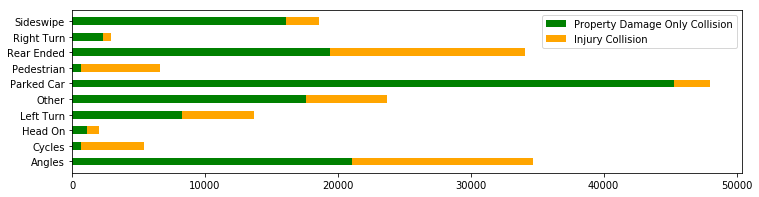

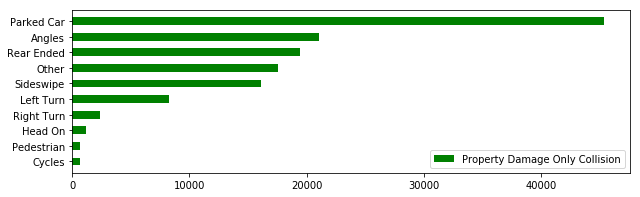

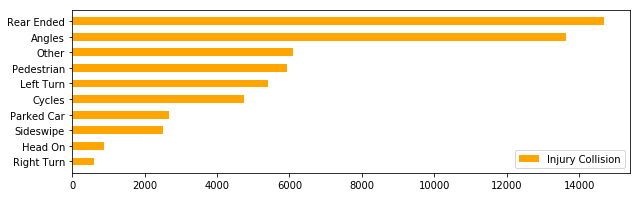

In [262]:
df=df_load
values = {'SPEEDING': 0,'PEDROWNOTGRNT':0,'INATTENTIONIND':0,'UNDERINFL':0}
df.fillna(value=values,inplace=True)
df.SPEEDING=df.SPEEDING.map({'0':0,'1':1,'N':0,'Y':1,0:0,1:1})
df.PEDROWNOTGRNT=df.PEDROWNOTGRNT.map({'0':0,'1':1,'N':0,'Y':1,0:0,1:1})
df.INATTENTIONIND=df.INATTENTIONIND.map({'0':0,'1':1,'N':0,'Y':1,0:0,1:1})
df.UNDERINFL=df.UNDERINFL.map({'0':0,'1':1,'N':0,'Y':1,0:0,1:1})
df.HITPARKEDCAR=df.HITPARKEDCAR.map({'0':0,'1':1,'N':0,'Y':1,0:0,1:1})

df['COUNT']=1
plt.figure(figsize=(12,3))
df1=df[df.SEVERITYCODE==1][['COLLISIONTYPE','COUNT']].groupby('COLLISIONTYPE').count().reset_index().sort_values(by='COLLISIONTYPE')
df2=df[df.SEVERITYCODE==2][['COLLISIONTYPE','COUNT']].groupby('COLLISIONTYPE').count().reset_index().sort_values(by='COLLISIONTYPE')
plt.barh(y=df1.COLLISIONTYPE,width=df1.COUNT,label='Property Damage Only Collision',color='green',height=0.5)
plt.barh(y=df2.COLLISIONTYPE,width=df2.COUNT,label='Injury Collision',color='orange',height=0.5,left=df1.COUNT)
plt.legend()
plt.show()

plt.figure(figsize=(10,3))
dfs1=df1.sort_values(by='COUNT')
plt.barh(y=dfs1.COLLISIONTYPE,width=dfs1.COUNT,label='Property Damage Only Collision',color='green',height=0.5)
plt.legend()
plt.show()

plt.figure(figsize=(10,3))
dfs2=df2.sort_values(by='COUNT')
plt.barh(y=dfs2.COLLISIONTYPE,width=dfs2.COUNT,label='Injury Collision',color='orange',height=0.5)
plt.legend()
plt.show()

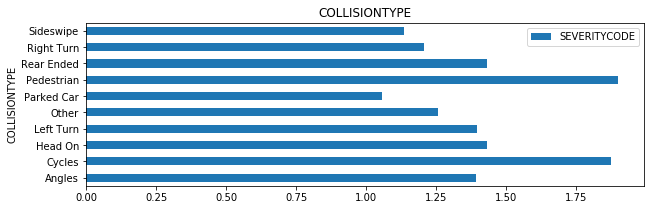

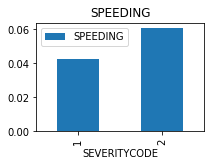

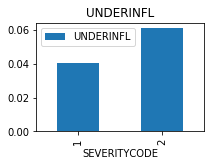

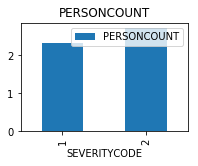

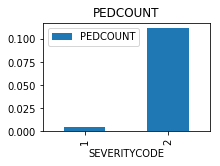

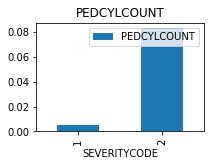

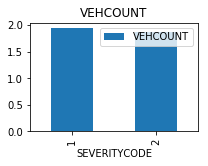

In [264]:
df[['COLLISIONTYPE','SEVERITYCODE']].groupby(['COLLISIONTYPE']).mean().plot(kind='barh',title='COLLISIONTYPE',figsize=(10,3))
df[['SPEEDING','SEVERITYCODE']].groupby(['SEVERITYCODE']).mean().plot(kind='bar',title='SPEEDING',figsize=(3,2))
df[['UNDERINFL','SEVERITYCODE']].groupby(['SEVERITYCODE']).mean().plot(kind='bar',title='UNDERINFL',figsize=(3,2))
df[['PERSONCOUNT','SEVERITYCODE']].groupby(['SEVERITYCODE']).mean().plot(kind='bar',title='PERSONCOUNT',figsize=(3,2))
df[['PEDCOUNT','SEVERITYCODE']].groupby(['SEVERITYCODE']).mean().plot(kind='bar',title='PEDCOUNT',figsize=(3,2))
df[['PEDCYLCOUNT','SEVERITYCODE']].groupby(['SEVERITYCODE']).mean().plot(kind='bar',title='PEDCYLCOUNT',figsize=(3,2))
df[['VEHCOUNT','SEVERITYCODE']].groupby(['SEVERITYCODE']).mean().plot(kind='bar',title='VEHCOUNT',figsize=(3,2))

In [265]:
df_map=df.dropna(subset=['X','Y'])
#Speeding
Map=folium.Map(location=[47.62,-122.3],zoom_start=11,attr='default')
for n,k in df_map[df_map.SPEEDING==1].sample(n=1000).iterrows():
    if k.Y is not None and k.X is not None:
        c='green' if k.SEVERITYCODE==1 else 'red'
        folium.CircleMarker(location=[k.Y,k.X],radius=1,fill=True,fill_color=c,color=c).add_to(Map)
Map

In [223]:
#underinflunce
Map=folium.Map(location=[47.62,-122.3],zoom_start=11,attr='default')
for n,k in df_map[df_map.UNDERINFL==1].sample(n=1000).iterrows():
    if k.Y is not None and k.X is not None:
        c='green' if k.SEVERITYCODE==1 else 'red'
        folium.CircleMarker(location=[k.Y,k.X],radius=1,fill=True,fill_color=c,color=c).add_to(Map)
Map

In [224]:
#in attendtioned
Map=folium.Map(location=[47.62,-122.3],zoom_start=11,attr='default')
for n,k in df_map[df_map.INATTENTIONIND==1].sample(n=1000).iterrows():
    if k.Y is not None and k.X is not None:
        c='green' if k.SEVERITYCODE==1 else 'red'
        folium.CircleMarker(location=[k.Y,k.X],radius=1,fill=True,fill_color=c,color=c).add_to(Map)
Map

In [226]:
#Parked Car
Map=folium.Map(location=[47.62,-122.3],zoom_start=11,attr='default')
for n,k in df_map[df_map.COLLISIONTYPE=='Parked Car'].sample(n=1000).iterrows():
    if k.Y is not None and k.X is not None:
        c='green' if k.SEVERITYCODE==1 else 'red'
        folium.CircleMarker(location=[k.Y,k.X],radius=1,fill=True,fill_color=c,color=c).add_to(Map)
Map

In [217]:
df=df_load.drop(['X','Y','OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC',\
                'SEVERITYCODE.1','SEVERITYDESC','INCDATE','INCDTTM','SEGLANEKEY','CROSSWALKKEY','SDOT_COLDESC','ST_COLDESC','SDOTCOLNUM','ST_COLCODE','SDOT_COLCODE'],axis=1)
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,NaN,N
1,1,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,N
2,1,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,NaN,N
3,1,Block,Other,3,0,0,3,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,NaN,N
4,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,NaN,N


In [219]:
for col in ['ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND']:
    for item in df[col].drop_duplicates():
        sub_col='IS_'+col+'_'+str(item)
        df[sub_col]=df[col].map(lambda x: 1 if x==item else 0)
    df=df.drop([col],axis=1)
    
df.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,...,IS_LIGHTCOND_Daylight,IS_LIGHTCOND_Dark - Street Lights On,IS_LIGHTCOND_Dark - No Street Lights,IS_LIGHTCOND_nan,IS_LIGHTCOND_Unknown,IS_LIGHTCOND_Dusk,IS_LIGHTCOND_Dawn,IS_LIGHTCOND_Dark - Street Lights Off,IS_LIGHTCOND_Other,IS_LIGHTCOND_Dark - Unknown Lighting
0,2,2,0,0,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,2,0,0,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,4,0,0,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,3,0,0,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2,2,0,0,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [38]:
df.iloc[:1000,:10].corr()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
SEVERITYCODE,1.000000,0.157984,0.185183,0.215675,-0.036399,0.033845,0.045701,0.195434,0.007403,-0.103974
PERSONCOUNT,0.157984,1.000000,-0.013516,-0.044032,0.419377,0.119188,0.017856,-0.046609,-0.050755,-0.063080
PEDCOUNT,0.185183,-0.013516,1.000000,-0.028722,-0.187881,-0.044389,0.001780,0.451463,-0.032349,-0.029196
PEDCYLCOUNT,0.215675,-0.044032,-0.028722,1.000000,-0.217157,-0.034827,-0.034064,0.434435,-0.036032,-0.032520
VEHCOUNT,-0.036399,0.419377,-0.187881,-0.217157,1.000000,0.120791,0.059796,-0.179517,-0.023892,-0.088471
INATTENTIONIND,0.033845,0.119188,-0.044389,-0.034827,0.120791,1.000000,-0.041258,-0.059310,-0.077872,-0.019598
UNDERINFL,0.045701,0.017856,0.001780,-0.034064,0.059796,-0.041258,1.000000,-0.029220,0.074061,-0.034626
PEDROWNOTGRNT,0.195434,-0.046609,0.451463,0.434435,-0.179517,-0.059310,-0.029220,1.000000,-0.030909,-0.027897
SPEEDING,0.007403,-0.050755,-0.032349,-0.036032,-0.023892,-0.077872,0.074061,-0.030909,1.000000,-0.036628
HITPARKEDCAR,-0.103974,-0.063080,-0.029196,-0.032520,-0.088471,-0.019598,-0.034626,-0.027897,-0.036628,1.000000


In [242]:
compare_df=pd.DataFrame()
train=df.iloc[:10000]
test=df.iloc[10000:11000]
x_train, y_train = train.iloc[:,1:10], train.iloc[:,0]
x_test ,y_test = test.iloc[:,1:10], test.iloc[:,0] 
###########2.回归部分##########
def try_different_method(model,name):
    model.fit(x_train,y_train)
    score = model.score(x_test, y_test)
    global compare_df
    compare_df=compare_df.append({'classifier':name,'score':score},ignore_index=True)
#     result = model.predict(x_test)
#     plt.figure(figsize=(16,2))
#     plt.plot(np.arange(len(result)), y_test,'go-',label='true value')
#     plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
#     plt.title('score: %f'%score)
#     plt.legend()
#     plt.show()
###########3.具体方法选择##########
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
m1 = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
m2 = QuadraticDiscriminantAnalysis()
from sklearn import svm
m3 = svm.SVC()
from sklearn import neighbors
m4 = neighbors.KNeighborsClassifier(20)
from sklearn.neural_network import MLPClassifier
m5 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
from sklearn.naive_bayes import GaussianNB
m6 = GaussianNB()
from sklearn import tree
m7 = tree.DecisionTreeClassifier()
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
m8 = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)
from sklearn.ensemble import RandomForestClassifier
m9 = RandomForestClassifier(n_estimators=10)
from sklearn.ensemble import AdaBoostClassifier
m10 = AdaBoostClassifier(n_estimators=100)
from sklearn.ensemble import GradientBoostingClassifier
m11 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

###########4.具体方法调用部分##########
try_different_method(m1,'LinearDiscriminant')
try_different_method(m2,'QuadraticDiscriminant')
try_different_method(m3,'SVM')
try_different_method(m4,'KNeighbors')
try_different_method(m5,'MLP')
try_different_method(m6,'GaussianNB')
try_different_method(m7,'DecisionTree')
try_different_method(m8,'BaggingClassifier')
try_different_method(m9,'RandomForest')
try_different_method(m10,'AdaBoost')
try_different_method(m11,'GradientBoosting')

compare_df.sort_values(by='score',ascending=False)

,classifier,score
2,SVM,0.739
6,DecisionTree,0.739
8,RandomForest,0.737
9,AdaBoost,0.737
10,GradientBoosting,0.737
3,KNeighbors,0.736
7,BaggingClassifier,0.734
0,LinearDiscriminant,0.732
1,QuadraticDiscriminant,0.728
5,GaussianNB,0.724


In [254]:
m7.fit(x_train,y_train)
features = list(x_train.columns)
for i in sorted(zip(map(lambda x: round(x, 4), m7.feature_importances_), features), reverse=True):
    print(i)

(0.3379, 'PERSONCOUNT')
(0.2783, 'PEDCOUNT')
(0.2352, 'PEDCYLCOUNT')
(0.0499, 'VEHCOUNT')
(0.0362, 'UNDERINFL')
(0.0255, 'SPEEDING')
(0.0221, 'INATTENTIONIND')
(0.0138, 'HITPARKEDCAR')
(0.0012, 'PEDROWNOTGRNT')


In [255]:
compare_df=pd.DataFrame()
train=df.iloc[:10000]
test=df.iloc[10000:11000]
x_train, y_train = train.iloc[:,1:], train.iloc[:,0]
x_test ,y_test = test.iloc[:,1:], test.iloc[:,0] 
###########2.回归部分##########
def try_different_method(model,name):
    model.fit(x_train,y_train)
    score = model.score(x_test, y_test)
    global compare_df
    compare_df=compare_df.append({'classifier':name,'score':score},ignore_index=True)
#     result = model.predict(x_test)
#     plt.figure(figsize=(16,2))
#     plt.plot(np.arange(len(result)), y_test,'go-',label='true value')
#     plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
#     plt.title('score: %f'%score)
#     plt.legend()
#     plt.show()
###########3.具体方法选择##########
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
m1 = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
m2 = QuadraticDiscriminantAnalysis()
from sklearn import svm
m3 = svm.SVC()
from sklearn import neighbors
m4 = neighbors.KNeighborsClassifier(20)
from sklearn.neural_network import MLPClassifier
m5 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
from sklearn.naive_bayes import GaussianNB
m6 = GaussianNB()
from sklearn import tree
m7 = tree.DecisionTreeClassifier()
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
m8 = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)
from sklearn.ensemble import RandomForestClassifier
m9 = RandomForestClassifier(n_estimators=10)
from sklearn.ensemble import AdaBoostClassifier
m10 = AdaBoostClassifier(n_estimators=100)
from sklearn.ensemble import GradientBoostingClassifier
m11 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

###########4.具体方法调用部分##########
try_different_method(m1,'LinearDiscriminant')
try_different_method(m2,'QuadraticDiscriminant')
try_different_method(m3,'SVM')
try_different_method(m4,'KNeighbors')
try_different_method(m5,'MLP')
try_different_method(m6,'GaussianNB')
try_different_method(m7,'DecisionTree')
try_different_method(m8,'BaggingClassifier')
try_different_method(m9,'RandomForest')
try_different_method(m10,'AdaBoost')
try_different_method(m11,'GradientBoosting')

compare_df.sort_values(by='score',ascending=False)

e:\app\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
e:\app\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
e:\app\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,classifier,score
0,LinearDiscriminant,0.746
10,GradientBoosting,0.745
9,AdaBoost,0.741
2,SVM,0.739
4,MLP,0.732
7,BaggingClassifier,0.727
3,KNeighbors,0.726
8,RandomForest,0.725
6,DecisionTree,0.699
5,GaussianNB,0.382


In [256]:
m11.fit(x_train,y_train)
features = list(x_train.columns)
for i in sorted(zip(map(lambda x: round(x, 4), m11.feature_importances_), features), reverse=True):
    print(i)

(0.4001, 'IS_COLLISIONTYPE_Parked Car')
(0.1553, 'PEDCOUNT')
(0.1271, 'PERSONCOUNT')
(0.1114, 'PEDCYLCOUNT')
(0.0866, 'IS_COLLISIONTYPE_Sideswipe')
(0.0245, 'IS_COLLISIONTYPE_Rear Ended')
(0.0219, 'IS_JUNCTIONTYPE_At Intersection (intersection related)')
(0.0161, 'UNDERINFL')
(0.0105, 'VEHCOUNT')
(0.0085, 'IS_COLLISIONTYPE_Right Turn')
(0.0057, 'IS_LIGHTCOND_Unknown')
(0.005, 'IS_COLLISIONTYPE_Other')
(0.0032, 'SPEEDING')
(0.0028, 'IS_JUNCTIONTYPE_Driveway Junction')
(0.0028, 'IS_COLLISIONTYPE_Angles')
(0.0026, 'INATTENTIONIND')
(0.0021, 'IS_ROADCOND_Oil')
(0.002, 'IS_ROADCOND_Dry')
(0.0018, 'IS_COLLISIONTYPE_Head On')
(0.0014, 'IS_COLLISIONTYPE_Left Turn')
(0.0011, 'IS_WEATHER_Snowing')
(0.0008, 'IS_ROADCOND_Other')
(0.0007, 'IS_ROADCOND_Unknown')
(0.0006, 'IS_WEATHER_Blowing Sand/Dirt')
(0.0006, 'IS_LIGHTCOND_Other')
(0.0006, 'IS_ADDRTYPE_Alley')
(0.0005, 'PEDROWNOTGRNT')
(0.0005, 'IS_JUNCTIONTYPE_Mid-Block (not related to intersection)')
(0.0005, 'IS_JUNCTIONTYPE_At Intersection (bu